# Network architecture visualization
## Visual components
### Neurons

In [1]:
from typing import Union
import matplotlib.pyplot as plt

# Type alias for numeric values used in coordinates and sizing
Numeric = Union[int, float]


def plot_neuron(
    x_coordinate: Numeric,
    y_coordinate: Numeric,
    bias_value: Numeric,
    marker_size: Numeric = 100,
) -> None:
    """
    Draw a neuron on the current plot.

    Args:
        x_coordinate: X position of the neuron on the plot
        y_coordinate: Y position of the neuron on the plot
        bias_value: Bias value (positive=steelblue, negative/zero=salmon)
        marker_size: Size of the neuron marker in points (default: 100)

    Returns:
        None (modifies the current matplotlib plot)
    """
    # Color-code neurons based on bias polarity
    color: str = "steelblue" if bias_value > 0 else "salmon"

    # Draw neuron as a colored circle with high z-order for visibility
    plt.scatter(
        [x_coordinate], [y_coordinate], s=marker_size, c=color, marker="o", zorder=2
    )

### Connections

In [2]:
from typing import List, Sequence, Union
import numpy as np
import matplotlib.pyplot as plt


# Type alias for numeric values
Numeric = Union[int, float]


def plot_connection_line(
    x_coords: Sequence[Numeric],
    y_coords: Sequence[Numeric],
    weight_value: Numeric,
    max_weight: Numeric = 1,
    line_width: Numeric = 5,
) -> None:
    """
    Draw smooth connection between neurons.

    Args:
        x_coords: X coordinates of the two neurons [start_x, end_x]
        y_coords: Y coordinates of the two neurons [start_y, end_y]
        weight_value: Weight of the connection (determines color and opacity)
        max_weight: Maximum weight value for normalization (default: 1)
        line_width: Width of the connection line in points (default: 5)

    Returns:
        None (modifies the current matplotlib plot)

    Note:
        - Positive weights are steelblue, negative are salmon
        - Opacity proportional to |weight_value| / max_weight
        - Uses smoothstep S-curve for connection
    """
    # Color-code connections based on weight polarity
    color: str = "steelblue" if weight_value > 0 else "salmon"

    # Generate parameter values for smooth curve
    t: np.ndarray = np.linspace(0, 1, 100)

    # Create smoothstep S-curve interpolation for natural-looking connections
    x_curve: np.ndarray = x_coords[0] + (t**2 * (3 - 2 * t)) * (
        x_coords[1] - x_coords[0]
    )
    y_curve: np.ndarray = y_coords[0] + t * (y_coords[1] - y_coords[0])

    # Draw connection with opacity based on weight magnitude
    plt.plot(
        x_curve,
        y_curve,
        alpha=abs(weight_value) / max_weight,
        c=color,
        linewidth=line_width,
        zorder=1,
    )

## Complete network visualization

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.figure import Figure
from typing import List


def visualize_network(
    weight_matrices: List[np.ndarray],
    bias_vectors: List[np.ndarray],
    marker_size: float = 100,
    line_width: float = 5,
) -> Figure:
    """
    Visualize neural network architecture with nodes and weighted connections.

    Args:
        weight_matrices: List of weight matrices for each layer
        bias_vectors: List of bias vectors for each layer
        marker_size: Size of neuron markers in points (default: 100)
        line_width: Width of connection lines in points (default: 5)

    Returns:
        Matplotlib figure containing the network visualization

    Raises:
        ValueError: If weight and bias dimensions don't match
    """
    # Extract network dimensions from weight matrices
    input_dim = weight_matrices[0].shape[1]
    network_dims = [input_dim] + [W.shape[0] for W in weight_matrices]
    bias_dims = [b.shape[0] for b in bias_vectors]

    # Validate network architecture consistency
    if network_dims[1:] != bias_dims:
        raise ValueError("Weight and bias dimensions do not match.")

    # Calculate neuron positions and find scaling factors
    positions_x, positions_y = [], []
    max_weight, max_bias = 0.0, 0.0

    for layer_index, layer_width in enumerate(network_dims):
        # Center neurons vertically within each layer
        x_positions = np.arange(layer_width) - 0.5 * (layer_width - 1)
        positions_x.append(x_positions)
        y_positions = np.full(layer_width, layer_index)
        positions_y.append(y_positions)

        # Track maximum values for normalization
        if layer_index < len(weight_matrices):
            max_weight = max(max_weight, np.max(np.abs(weight_matrices[layer_index])))
        if layer_index > 0:
            max_bias = max(max_bias, np.max(np.abs(bias_vectors[layer_index - 1])))

    # Configure plot for high-quality output
    plt.rcParams["figure.dpi"] = 300
    fig, ax = plt.subplots()
    plt.ioff()
    plt.axis(False)
    ax.set_aspect("equal")

    # Draw weighted connections between layers
    for layer_index in range(1, len(network_dims)):
        for output_neuron in range(network_dims[layer_index]):
            for input_neuron in range(network_dims[layer_index - 1]):
                x_coords = [
                    positions_x[layer_index - 1][input_neuron],
                    positions_x[layer_index][output_neuron],
                ]
                y_coords = [
                    positions_y[layer_index - 1][input_neuron],
                    positions_y[layer_index][output_neuron],
                ]
                plot_connection_line(
                    x_coords,
                    y_coords,
                    weight_matrices[layer_index - 1][output_neuron, input_neuron],
                    max_weight=max_weight,
                    line_width=line_width,
                )

    # Draw neurons with bias-based coloring
    for layer_index in range(len(network_dims)):
        for neuron in range(network_dims[layer_index]):
            if layer_index == 0:
                # Input layer neurons have neutral bias representation
                plot_neuron(
                    positions_x[layer_index][neuron],
                    positions_y[layer_index][neuron],
                    bias_value=1,
                    marker_size=marker_size,
                )
            else:
                # Hidden and output layer neurons use actual bias values
                plot_neuron(
                    positions_x[layer_index][neuron],
                    positions_y[layer_index][neuron],
                    bias_vectors[layer_index - 1][neuron],
                    marker_size=marker_size,
                )

    plt.close()
    return fig

### Test

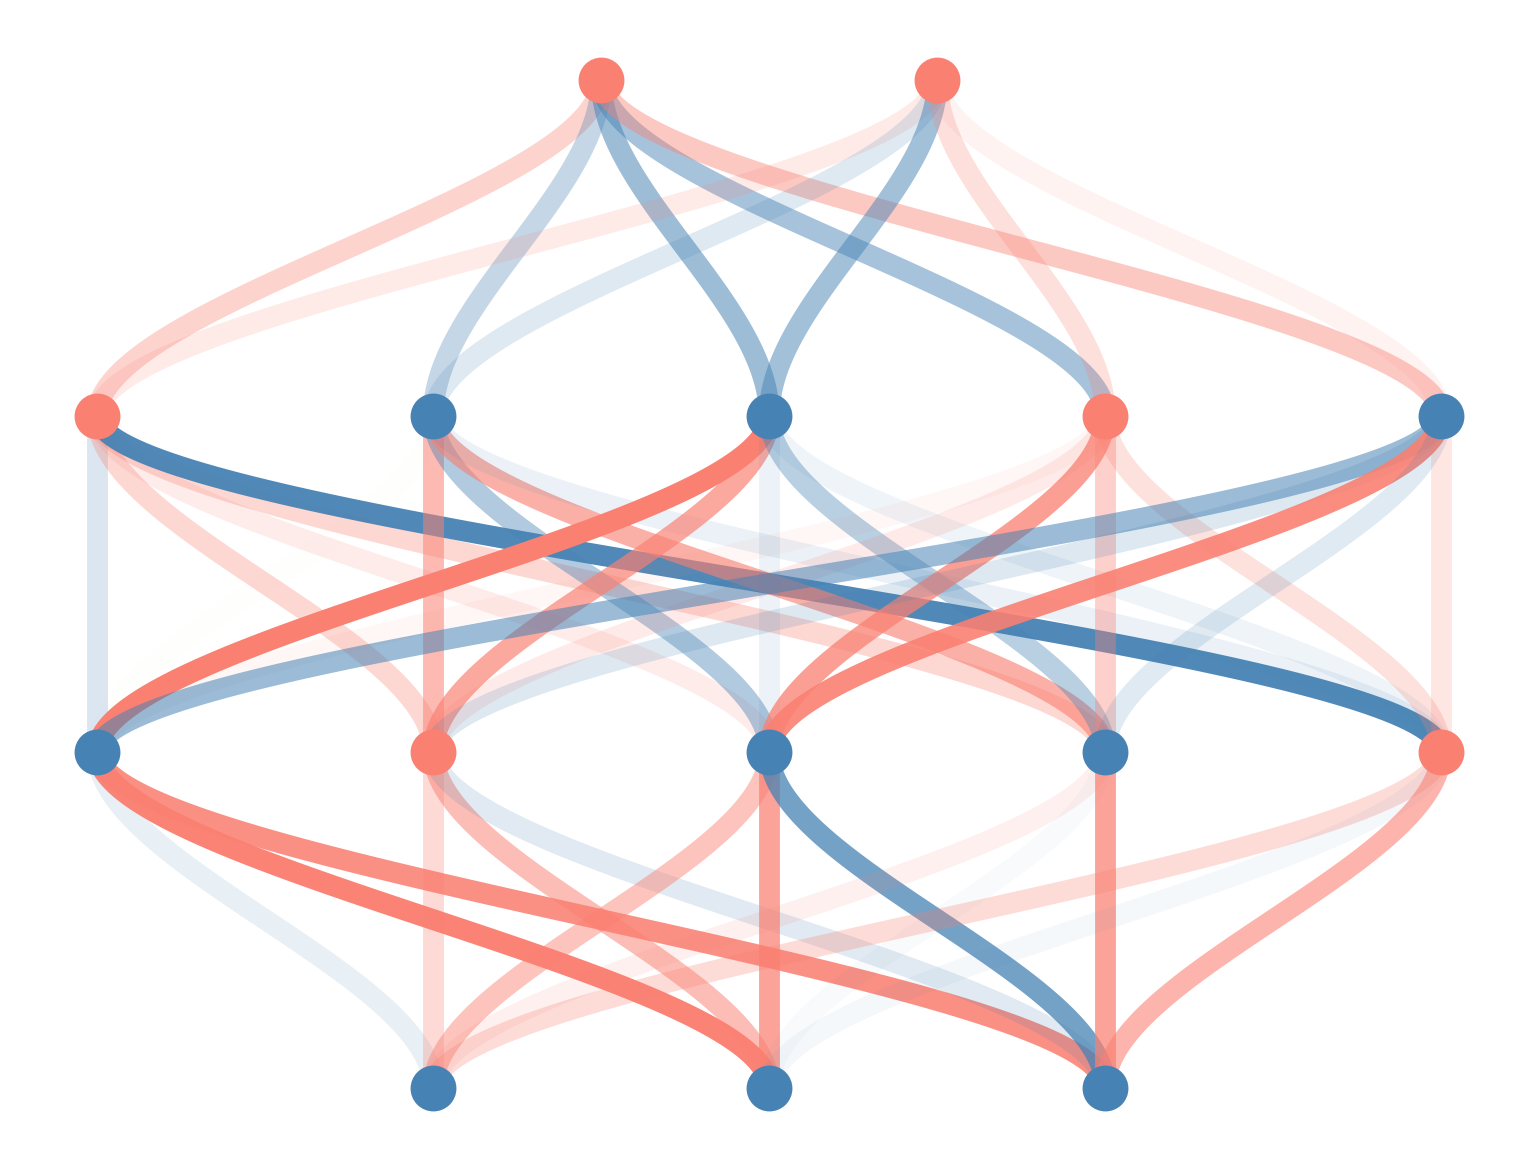

In [4]:
import numpy as np

# Define network architecture parameters
input_dimension = 3
output_dimension = 2
num_layers = 2
layer_width = 5

# Build network dimensions: input -> hidden layers -> output
network_dimensions = [input_dimension] + [layer_width] * num_layers + [output_dimension]

# Initialize random network parameters with fixed seed
np.random.seed(42)
bias_vectors = [
    np.random.randn(network_dimensions[i]) for i in range(1, len(network_dimensions))
]
weight_matrices = [
    np.random.randn(network_dimensions[i], network_dimensions[i - 1])
    for i in range(1, len(network_dimensions))
]

# Generate network architecture visualization
visualize_network(weight_matrices, bias_vectors)